In [ ]:
#Part:1

#Stochastic gradient descent by using learning rate and cost function

import tensorflow as tf

x=tf.constant([1.0,2.0,4.0,3.0,5.0])
y=tf.constant([1.0,3.0,3.0,2.0,5.0])

theta_0=tf.constant(0.0)
theta_1=tf.constant(0.0)
new_theta_1=tf.constant(0.0)
new_theta_0=tf.constant(0.0)

alpha=tf.constant(0.05)

with tf.Session() as sess:
    with tf.name_scope("Cost_Function2"):
        def s1(x,y,tit1,tit0):
            m=tf.constant(len(sess.run(x)))
            sum2=tf.constant(0.0)
        
            for i in range(len(sess.run(x))):
                sum2=tf.add(sum2,tf.multiply(tf.subtract(tf.add(theta_0,tf.multiply(theta_1,x[i])),y[i]),x[i]))
        
            return sum2

    with tf.name_scope("Cost_Function1"):
        def s0(x,y,tit0):
            m=tf.constant(len(sess.run(x)))
            sum1=tf.constant(0.0)
        
            for i in range(len(sess.run(x))):
                sum1=tf.add(sum1,tf.subtract(tf.multiply(theta_0,x[i]),y[i]))
        
            return sum1


new_theta_1=tf.subtract(theta_1,tf.multiply(alpha,s1(x,y,theta_1,theta_0)))
new_theta_0=tf.subtract(theta_0,tf.multiply(alpha,s0(x,y,theta_0)))
    
with tf.name_scope("Minimize_error"):
        #while(sess.run(tf.abs(tf.subtract(new_theta_1,theta_1)))>0.0001 or sess.run(tf.abs(tf.subtract(new_theta_0,theta_0)))>0.0001):
        for i in range(100):
            theta_1=new_theta_1
            theta_0=new_theta_0
            new_theta_1=tf.subtract(theta_1,tf.multiply(alpha,s1(x,y,theta_1,theta_0)))
            new_theta_0=tf.subtract(theta_0,tf.multiply(alpha,s0(x,y,theta_0)))
            
cst_val=tf.div(tf.reduce_sum(tf.square(tf.subtract(tf.add(theta_0,tf.multiply(theta_1,x))),y)),tf.multiply(2,len(sess.run(x))))

print("Value of theta_1:",sess.run(theta_1))
print("Value of theta_0:",sess.run(theta_0))
print("Value of theta_0:",sess.run(cst_val))




Epoch: 005 cost= 26.4820194
Epoch: 010 cost= 14.6906681
Epoch: 015 cost= 8.2006025
Epoch: 020 cost= 4.6284332
Epoch: 025 cost= 2.6622987
Epoch: 030 cost= 1.5801308
Epoch: 035 cost= 0.9844956
Epoch: 040 cost= 0.6566406
Epoch: 045 cost= 0.4761651
Epoch: 050 cost= 0.3768010
Epoch: 055 cost= 0.3220747
Epoch: 060 cost= 0.2919129
Epoch: 065 cost= 0.2752680
Epoch: 070 cost= 0.2660604
Epoch: 075 cost= 0.2609443
Epoch: 080 cost= 0.2580786
Epoch: 085 cost= 0.2564510
Epoch: 090 cost= 0.2555039
Epoch: 095 cost= 0.2549313
Epoch: 100 cost= 0.2545645
Training cost= 0.254564 W= 0.902952 b= 0.00208929 



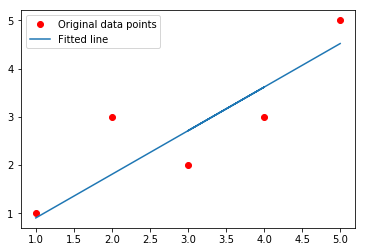

In [14]:
#Using epochs

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
rng = np.random

learning_rate = 0.005
training_epochs = 100
display_step = 5
ep=[]
cst=[]

train_X =np.asarray([1.0,2.0,4.0,3.0,5.0])
train_Y =np.asarray([1.0,3.0,3.0,2.0,5.0])
n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2.0))/tf.to_float(tf.multiply(2,n_samples))

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%03d' % (epoch+1), "cost=", "{:.7f}".format(c))
            #tf.concat(ep,epoch+1)
            #q=tf.log(epoch+1)
            #ep.append(q)
            #p=tf.log(format(c))
            #cst.append(p)

    
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    plt.plot(train_X, train_Y, 'ro', label='Original data points')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    #print(sess.run(ep))
    #print(sess.run(cst))
    
    

In [ ]:
#Part 2

#for plotting the graph cost against epoch value    
    
    #plt.plot(sess.run(cst), sess.run(ep), 'ro')
    #plt.legend()
    #plt.show()
    
    